# Student Performance Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
data = pd.read_csv('student_performance_data.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Data quality check

In [3]:
# Check for missing values
missing = data.isnull().sum()
missing

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
# Checking for duplicates
duplicates = data.duplicated().sum()
duplicates

0

In [5]:
# Format the columns

In [99]:
# Gender,Ethnicity, ParentalEducation,StudyTimeWeekly,GPA,ParentalSupport, Tutoring, Extracurricular, Sports, music and volunteering

data['Gender'] = data['Gender'].replace({0:'Male',1:'Female'})
data['Ethnicity'] = data['Ethnicity'].replace({0:'Caucasian',1:'African',2:'Asian',3:'Other'})
data['ParentalEducation'] = data['ParentalEducation'].replace({0:'None',1:'High School',2:'Some College',3:"Bachelor's",4:'Higher'})
data['StudyTimeWeekly'] = data['StudyTimeWeekly'].round(2)
data['GPA'] = data['GPA'].round(2)
data['ParentalSupport'] = data['ParentalSupport'].replace({0:'None',1:'Low',2:'Moderate',3:'High',4:'Very High'})
data['Tutoring'] = data['Tutoring'].replace({1:'Yes',0:'No'})
data['Extracurricular'] = data['Extracurricular'].replace({1:'Yes',0:'No'})
data['Sports'] = data['Sports'].replace({1:'Yes',0:'No'})
data['Music'] = data['Music'].replace({1:'Yes',0:'No'})
data['Volunteering'] = data['Volunteering'].replace({1:'Yes',0:'No'})

In [7]:
# Validate data type
data.dtypes

StudentID              int64
Age                    int64
Gender                object
Ethnicity             object
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring              object
ParentalSupport       object
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
GPA                  float64
GradeClass           float64
dtype: object

In [8]:
# Change GradeClass dtype to integer

data['GradeClass'] = data['GradeClass'].astype('int64')
data['StudentID'] = data['StudentID'].astype('str')

In [100]:
# Add column grade
def grade(x):
    if x['GradeClass'] == 0:
        return 'A'
    elif x['GradeClass'] == 1:
        return 'B'
    elif x['GradeClass'] == 2:
        return 'C'
    elif x['GradeClass'] == 3:
        return 'D'
    else:
        return 'F'

data['Grade'] = data.apply(grade, axis = 1)

## Data Analysis

In [110]:
# Summary
data.describe()

,Age,StudyTimeWeekly,Absences,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.772044,14.541388,1.906162,2.983696
std,1.123798,5.652756,8.467417,0.915192,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,5.040000,7.000000,1.170000,2.000000
50%,16.000000,9.710000,15.000000,1.890000,4.000000
75%,17.000000,14.410000,22.000000,2.620000,4.000000
max,18.000000,19.980000,29.000000,4.000000,4.000000


### 1:Do parental support has an influence on student performance

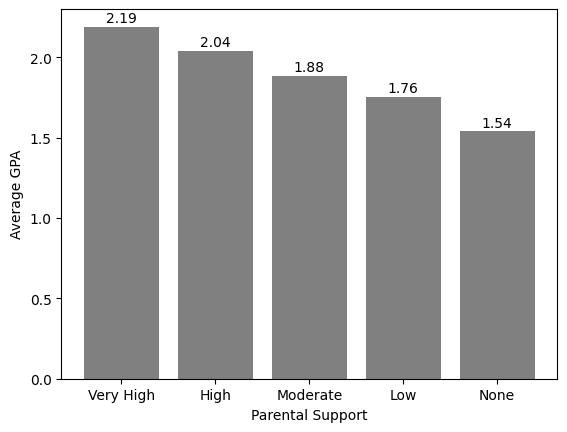

In [105]:
category_group = data.groupby('ParentalSupport').mean(numeric_only = True)['GPA'].sort_values(ascending = False)
parental_support = category_group.index
avg_gpa = category_group.values
plt.xlabel('Parental Support')
plt.ylabel('Average GPA')
bars = plt.bar(parental_support, avg_gpa, color='gray')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
plt.show()

In [13]:
# It is evident that parental support has an influence on student performance

### 2:Do the students studying for more hours perform better?

In [14]:
correlation = data['StudyTimeWeekly'].corr(data['GPA'])
print(f"The correlation between StudyTimeWeekly and GPA is {round(correlation,3)}.")

The correlation between StudyTimeWeekly and GPA is 0.179.


In [15]:
# A correlation of 0.179 suggests that there is some tendency for students who study more hours per week to have slightly higher GPAs.However, the 
# correlation is weak, implying that study time alone does not strongly predict GPA.Other factors could have a more significant impact on GPA,
# therefore it does not mean that studying more directly causes higher GPA. 

### 3:How does the parental education affect performance of the student?

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
model = ols('GPA ~ C(ParentalEducation)', data = data).fit()
anova_table = sm.stats.anova_lm(model, type = 2)
print(anova_table)

                          df       sum_sq   mean_sq         F    PR(>F)
C(ParentalEducation)     4.0     6.033576  1.508394  1.803323  0.125422
Residual              2387.0  1996.612193  0.836453       NaN       NaN


In [18]:
# Since the p-Value is greater than 0.05 we fail to reject the null hypothesis indicating no significant difference in GPAs among the groups.

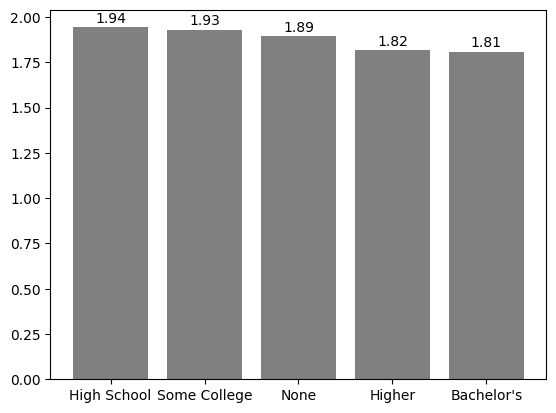

In [104]:
category_group = data.groupby('ParentalEducation').mean(numeric_only = True)['GPA'].sort_values(ascending = False)
parental_education = category_group.index
avg_gpa = category_group.values
bars = plt.bar(parental_education,category_group, color = 'gray')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
plt.show()

### 4:Is there a significance difference between tutored and non tutored students

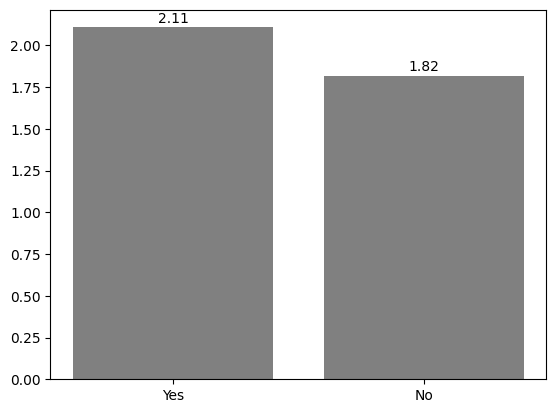

In [103]:
category = data.groupby('Tutoring').mean(numeric_only = True)['GPA'].sort_values(ascending = False)
tutoring = category.index
avg_gpa = category.values
bars = plt.bar(tutoring,avg_gpa,color = 'gray')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
plt.show()

In [21]:
# Clearly there is a significant difference between tutored and non tutored students.
# Tutored students tend to do better than non tutored students

### 5:Does the absence of the student affect performance?

In [25]:
correlation = data['Absences'].corr(data['GPA'])
round(correlation,3)

-0.919

In [24]:
# This indicates a strong negative relationship between absences and GPA.This means as one variable increases the other decreases significantly.

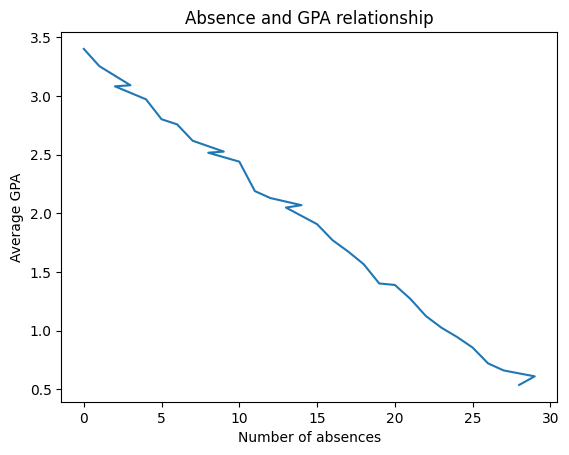

In [30]:
category = data.groupby('Absences').mean(numeric_only = True)['GPA'].sort_values(ascending = False)
absences = category.index
gpa = category.values
plt.title("Absence and GPA relationship")
plt.xlabel("Number of absences")
plt.ylabel("Average GPA")
plt.plot(absences,gpa)
plt.show()

### 6:What is the influence of extracurricular activities on student performance ?

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('GPA ~ C(Extracurricular)',data = data).fit()
anova_table_2 = sm.stats.anova_lm(model,type = 2)
print(anova_table_2)

                        df       sum_sq    mean_sq          F    PR(>F)
C(Extracurricular)     1.0    17.748245  17.748245  21.370527  0.000004
Residual            2390.0  1984.897524   0.830501        NaN       NaN


In [37]:
# Since the p value is less than 0.05 we reject the null hypothesis indicating the effect of the factor is statistically significant.

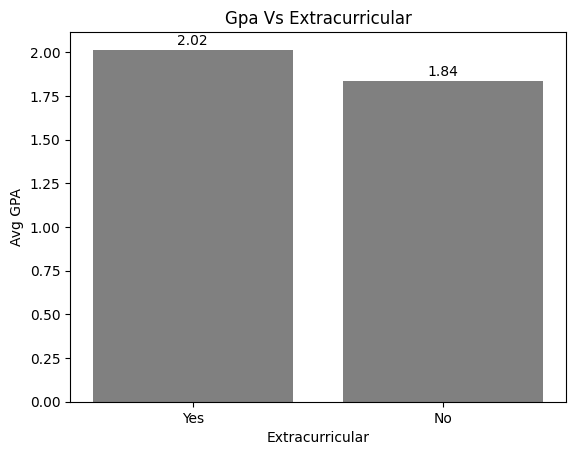

In [102]:
category = data.groupby('Extracurricular').mean(numeric_only = True)['GPA'].sort_values(ascending = False)
extracurricular = category.index
avg_gpa = category.values

bars = plt.bar(extracurricular,avg_gpa,color = 'gray',width = 0.8)
plt.title('Gpa Vs Extracurricular')
plt.ylabel('Avg GPA')
plt.xlabel('Extracurricular')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom') 
plt.show()

In [57]:
# This is a clear indication that the students performing in extracurricular activities do better than those who don't.

### 7: Is there a significance difference in gpa between ethnic groups?

In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('GPA ~ C(Ethnicity)',data = data).fit()
anova_table_2 = sm.stats.anova_lm(model,type = 2)
print(anova_table_2)

                  df       sum_sq   mean_sq         F   PR(>F)
C(Ethnicity)     3.0     2.414908  0.804969  0.961022  0.41019
Residual      2388.0  2000.230861  0.837618       NaN      NaN


In [109]:
# Since the p value is greater than 0.05 we fail to reject the null hypothesis indicating no significant difference in GPAs among the groups

### 8:What is the Number of students in each grade category

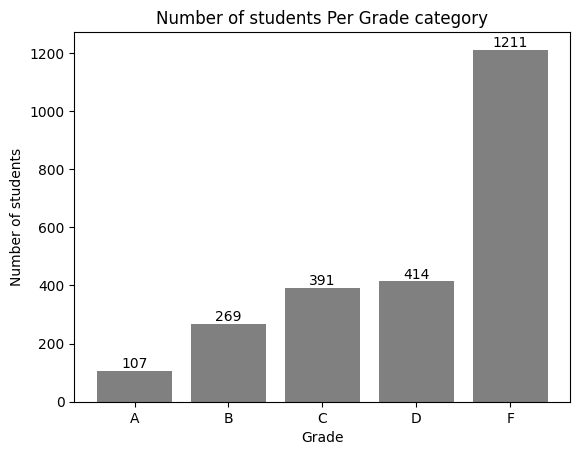

In [101]:
category = data.groupby('Grade').count()['StudentID']
grade = category.index
student_number = category.values

bars = plt.bar(grade,student_number, color = 'gray')
plt.title('Number of students Per Grade category')
plt.xlabel('Grade')
plt.ylabel('Number of students')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01,round(yval,2),ha = 'center', va = 'bottom')
    
plt.show()